# Статистика, DS-поток
## Задание SP.4

Задача 1: Визуализация функции правдоподобия.
▫️ Наличие решения. (50.0)
▫️ Неправильно передается параметр распределения Коши . Комм. Правильно sps.cauchy(loc=grid), в условии написано именно про параметр сдвига. (-5.0)
▫️ Можно было чуть больше поразмышлять про зависимость вида функции правдоподобия от элементов выборки. Комм. К примеру, в случае нормального распределения при любых значениях элементов выборки полученная функция будет иметь один и тот же вид - симметричная относительно среднего гауссовская кривая. Обратное видим в праспределении Коши - небольшое изменение значения элеманта выборки радикально изменяет характер полученной функции. (0.0)
Баллы: 45.0 / 50.0

Задача 2: Оценка параметра по обрезанной выборке.
▫️ Пункт 1: наличие решения. (45.0)
▫️ Пункт 2: наличие решения. (45.0)
▫️ Пункт 3: наличие решения. (60.0)
▫️ Ошибка в 2-ом пункте. Инд. комм. Неверная оценка (-15.0)
▫️ Нет анализа разбросов оценок. Комм. Стоило сравнить подходы для разных n. Это может повлиять на выводы. . (-15.0)
▫️ Нет визуализации - наглядного графика сравнения трех оценок по отношению к истинной. . Комм. Также можно было поэкспериментировать с тем, как ведут себя оценки в зависимости от размера выборки. (-25.0)
▫️ Нет аналитики скорости сходимости различных методов. (-10.0)
▫️ Нет объяснений минусов первого подхода. Комм. Нет попытки объяснить почему первый метод хуже двух других. Например, он использует не всю выборку для получения оценки. Инд. комм. На самом деле первый подход хуже всех и как раз из-за того, что мы выкинули много значений (-5.0)
Баллы: 80.0 / 150.0

Сумма: 125 / 200.0

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5, palette='Set2')

_______
## Задача 1.
Дана параметрическая модель и 3 выборки, состоящие из 2-3 наблюдений. Для удобства, выборки представлены в виде python-кода — каждая выборка записана как список ее элементов; множество выборок представлено как список списков, соответствующих выборкам из множества. Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: `[[-1, 1], [-5, 5], [-1, 5]]`

*b).* Параметрическая модель $Exp(\theta)$, выборки: `[[1, 2], [0.1, 1], [1, 10]]`

*c).* Параметрическая модель $U[0, \theta]$, выборки: `[[0.2, 0.8], [0.5, 1], [0.5, 1.3]]`

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: `[[0, 1], [5, 5], [0, 5]]`

*e).* Параметрическая модель $Pois(\theta)$, выборки: `[[0, 1], [0, 10], [5, 10]]`

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, выборки: `[[-0.5, 0.5], [-2, 2], [-4, 0, 4]]`

Выполнить задание, не создавая много кода, поможет следующая функция.

In [2]:
def draw_likelihood(density_function, grid, samples, label):
    '''
    Изображает график функции правдоподобия для каждой из 3 выборок.
    
    Аргументы:
        density_function --- функция, считающая плотность 
            (обычную или дискретную). На вход данная функция 
            должна принимать массив размера (1, len_sample)
            и возвращать массив размера (len_grid, len_sample).
        grid --- массив размера (len_grid, 1), являющийся 
                 сеткой для построения графика;
        samples --- три выборки;
        label --- latex-код параметрической модели.
    '''
    
    assert len(samples) == 3, "Число выборок не равно 3."

    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = np.prod(density_function(sample), axis=1)

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода:

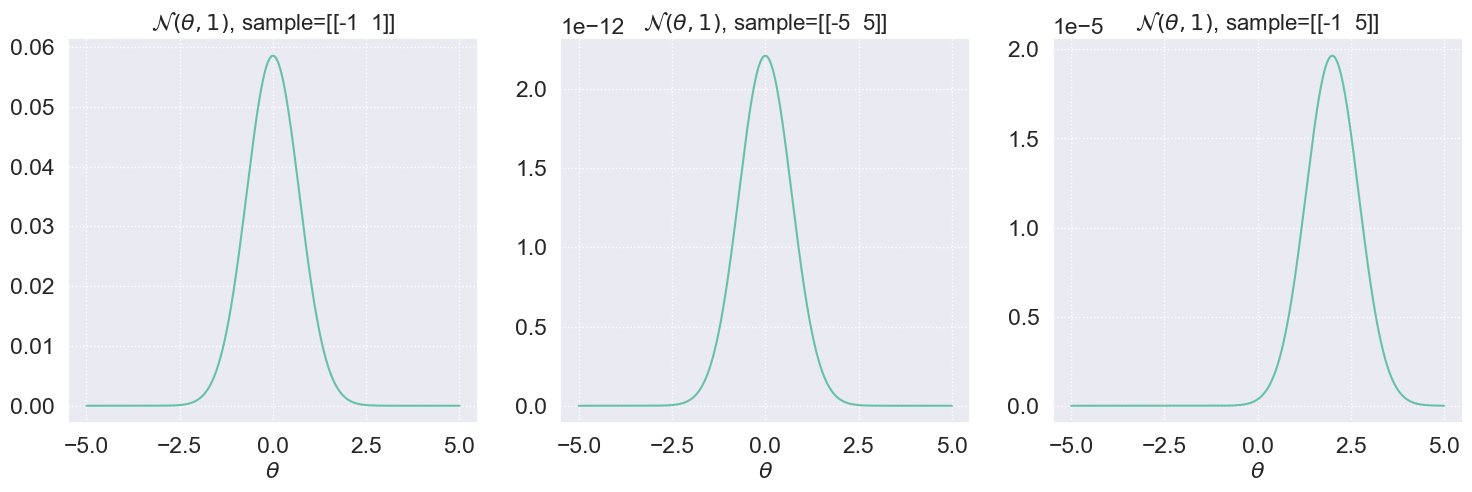

In [3]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid, 
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

Для каждой выборки строится график, показывающий, как изменяется правдоподобие параметра θ (значений из сетки grid) относительно этой выборки.

График показывает, насколько θ вероятно для данной выборки.

Видим, что максимум функции правдоподобия - это среднее значений выборки, то есть оценка матожидания. По форме график напоминает функцию плотности нормального распределения.

C:\Users\rusin\AppData\Local\Temp\ipykernel_26964\347731013.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


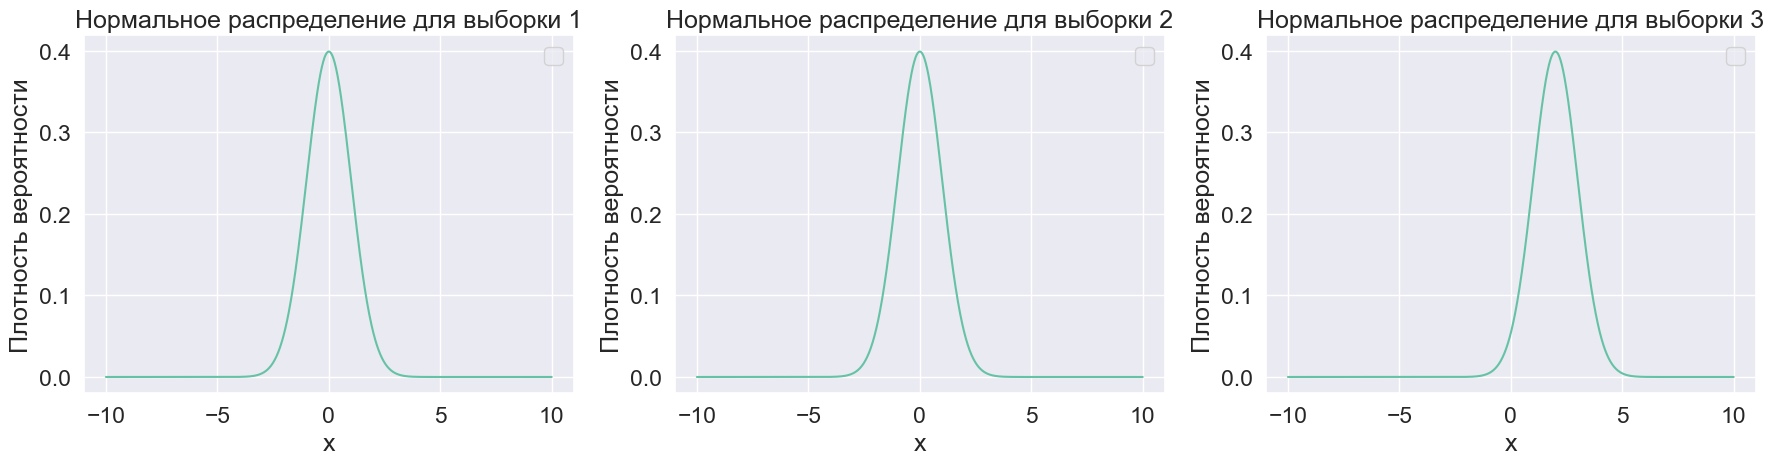

In [6]:
def plot_normal_distributions(samples):
    
    assert len(samples) == 3, "Число выборок должно быть равно 3."
    
    # Создание сетки для оси x (значения от -10 до 10)
    x = np.linspace(-10, 10, 1000)
    
    # Настройка графика
    plt.figure(figsize=(18, 5))
    
    # Цикл по выборкам для построения графиков
    for i, sample in enumerate(samples):
        # Вычисляем среднее значение для выборки
        mean = np.mean(sample)
        
        # Строим график нормального распределения с вычисленным средним и дисперсией 1
        pdf = sps.norm(loc=mean, scale=1).pdf(x)
        
        # Построение подграфика
        plt.subplot(1, 3, i+1)
        plt.plot(x, pdf)
        plt.title(f'Нормальное распределение для выборки {i+1}')
        plt.xlabel('x')
        plt.ylabel('Плотность вероятности')
        plt.grid(True)
        plt.legend(loc='best')
    
    # Отображение всех графиков
    plt.tight_layout()
    plt.show()

# Пример использования:
samples = [[-1, 1], [-5, 5], [-1, 5]]
plot_normal_distributions(samples)


Выполните остальные:

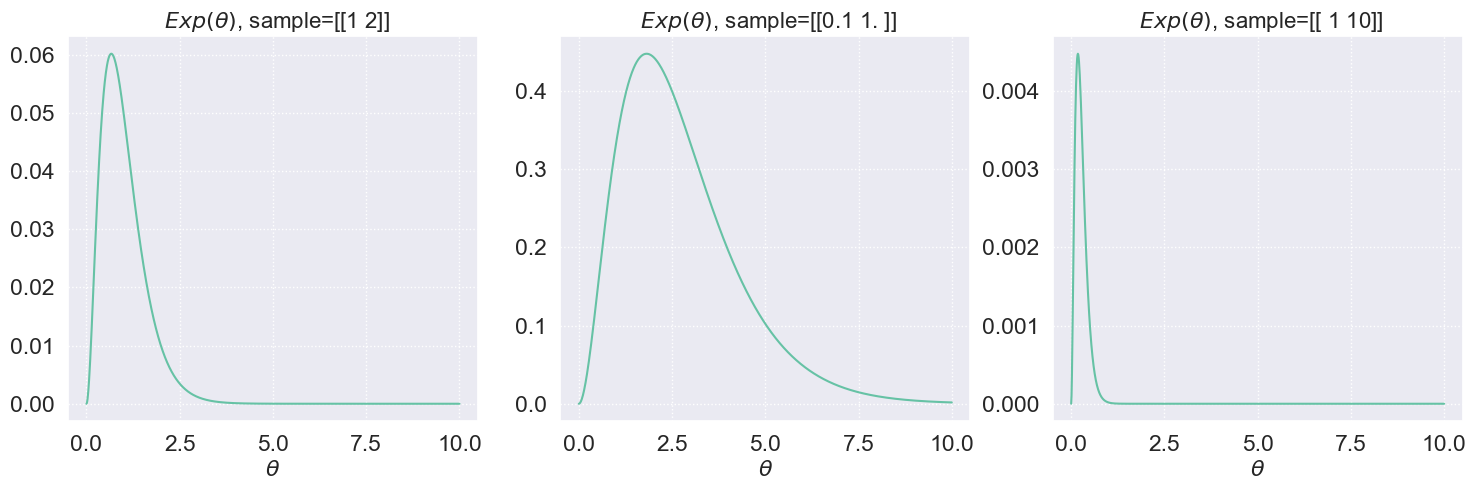

In [4]:
grid = np.linspace(0.001, 10, 1000).reshape((-1, 1))
draw_likelihood(sps.expon(scale=1/grid).pdf, grid,
                [[1, 2], [0.1, 1], [1, 10]], '$\\ Exp(\\theta)$')

Похоже на график плотности экспоненциального распределения начиная с максимума. Пик становится уже с ростом абсолютных значений в выборке

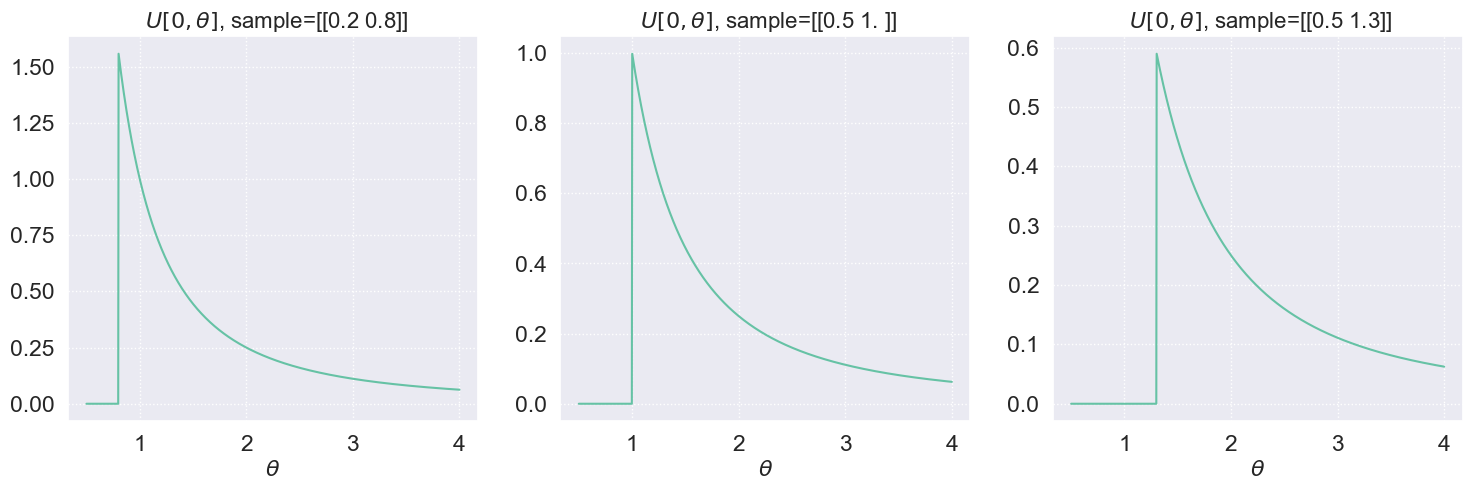

In [8]:
grid = np.linspace(0.5, 4, 1000).reshape((-1, 1))
draw_likelihood(sps.uniform(loc=0, scale=grid).pdf, grid,
                [[0.2, 0.8], [0.5, 1], [0.5, 1.3]], '$\\ U[0, \\theta]$')

Функция правдоподобия сначала равна 0, затем достигает максимума в $X_{(n)}$ и далее убывает по гиперболе, как плотность равномерного распределения.

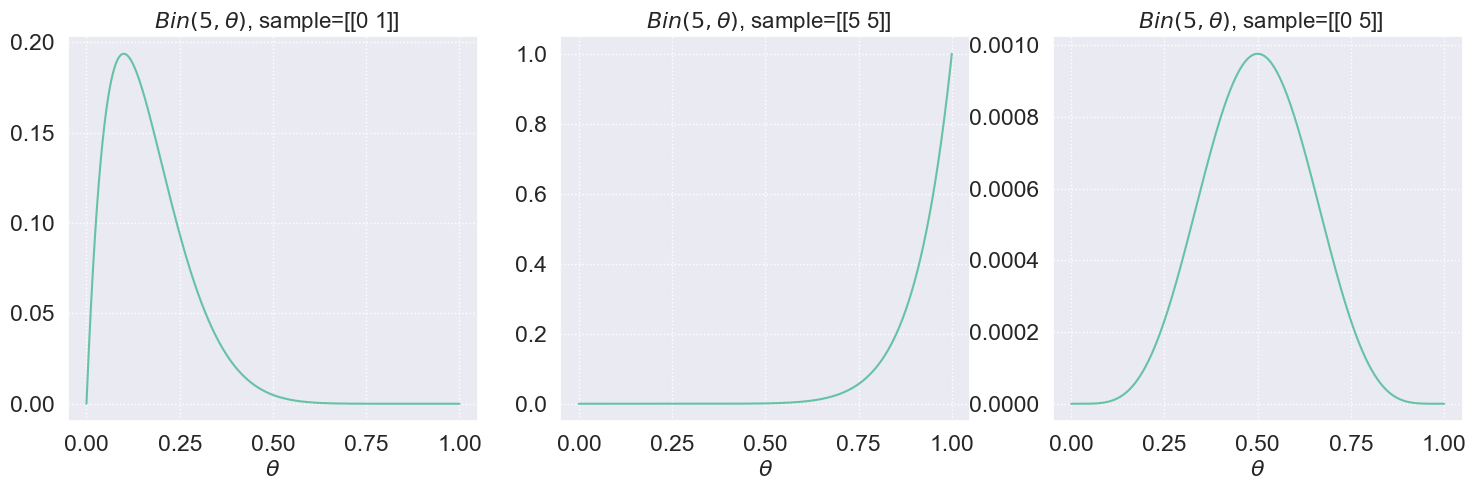

In [18]:
grid = np.linspace(0, 1, 1000).reshape((-1, 1))
draw_likelihood(sps.binom(5, grid).pmf, grid,
                [[0, 1], [5, 5], [0, 5]], '$\\ Bin(5, \\theta)$')

Похоже на плотность биномиального распределения

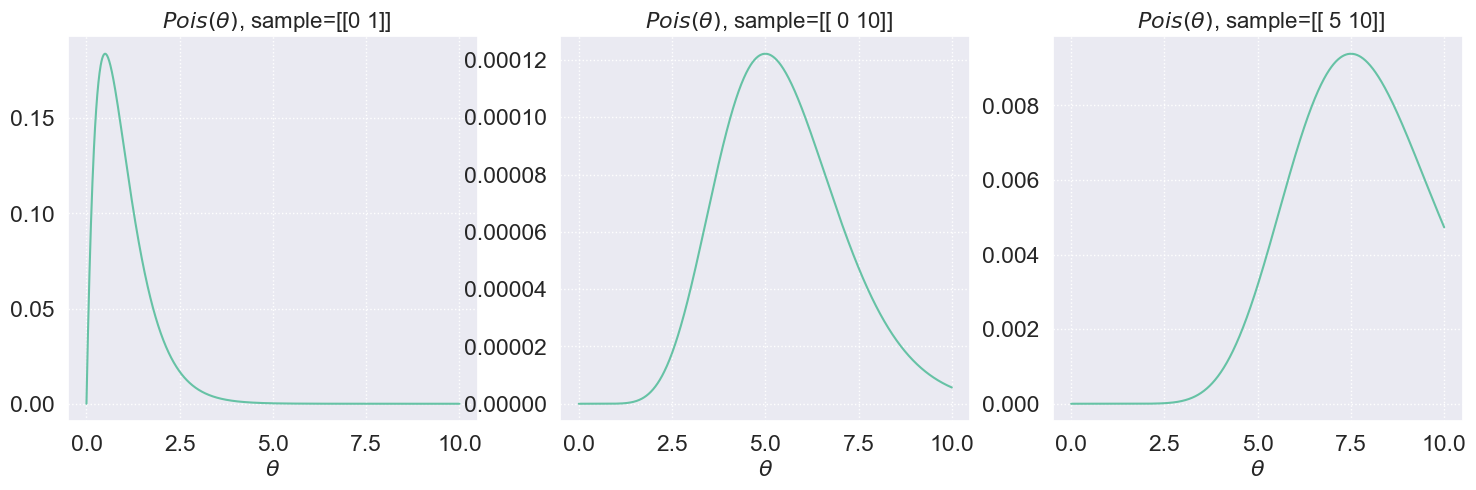

In [19]:
grid = np.linspace(0, 10, 1000).reshape((-1, 1))
draw_likelihood(sps.poisson(mu=grid).pmf, grid,
                [[0, 1], [0, 10], [5, 10]], '$\\ Pois(\\theta)$')

Похоже на плотность распределения Пуассона.

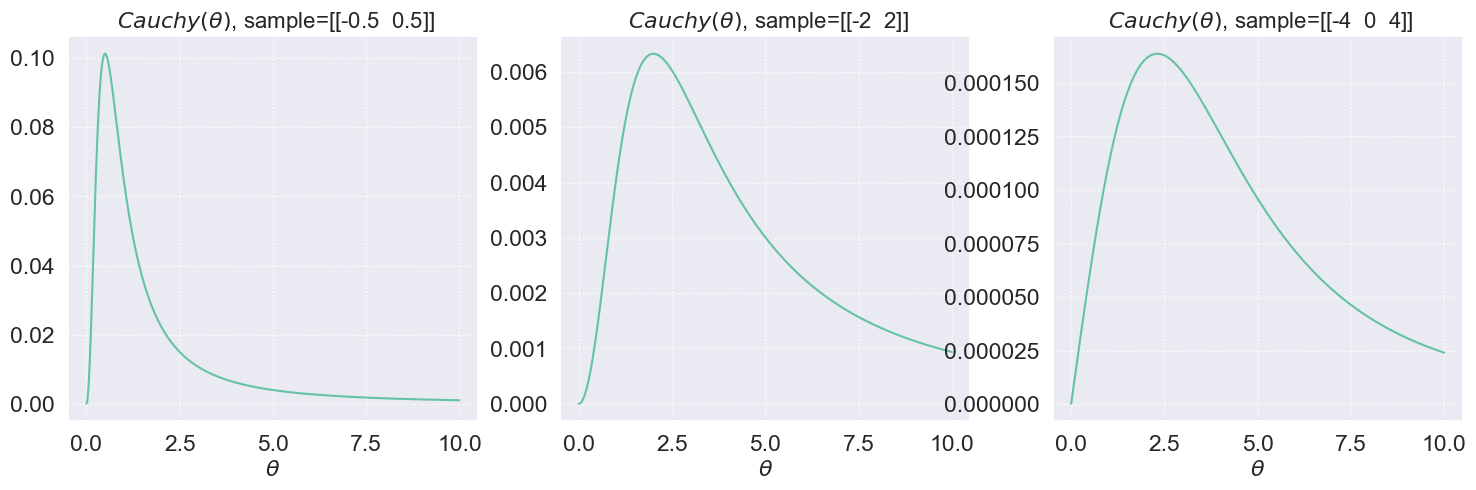

In [20]:
grid = np.linspace(0.001, 10, 1000).reshape((-1, 1))
draw_likelihood(sps.cauchy(scale=grid).pdf, grid,
                [[-0.5, 0.5], [-2, 2], [-4, 0, 4]], '$\\ Cauchy(\\theta)$')

Похоже на плотность распредения Коши. График становится шире при увеличении выборочной дисперсии

Прокомментируйте полученные графики. Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

**Вывод:**

Форма функции правдоподобия напрямую зависит от выборки. Если выборка состоит из данных, которые концентрируются вокруг какого-то значения, то функция правдоподобия также будет иметь пик около этого значения.

Функция правдоподобия похожа на функцию плотности вероятности по форме, потому что обе отображают вероятности, но они отражают разные зависимости:
Плотность вероятности фиксирует параметры и оценивает вероятности различных значений случайной величины.
Функция правдоподобия фиксирует данные и оценивает, какие значения параметра распределения (
θ) наилучшим образом объясняют выборку.
Несмотря на внешнее сходство, функция правдоподобия не является плотностью, так как она не нормализована и рассматривает вероятность параметров, а не самих данных.

При анализе графиков функции правдоподобия можно определить наилучшие оценки параметров модели.

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже:

In [21]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


In [22]:
sps.norm.logpdf(sample).sum()

-142067.23798790778

Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчета оценки максимального правдоподобия? Реализуйте это.

*Подсказка:* нужно использовать некоторый метод класса, реализующий это распределение

**Ответ на вопрос и описание метода решения проблемы:**

Функция правдоподобия - это произведение n штук вероятностей (n - размер выборки), каждая вероятность меньше единицы, поэтому при большом n такое произведение стремится к нулю. Решается это тем, что мы берем логарифм от функции правдоподобия и складываем логарифмы вероятности для каждого элемента выборки. На максимум это не влияет в силу монотонного возрастания логарифма.

______
## Задача 2. 
Компания выпустила $n$ серверов новой модели с увеличенным сроком службы. До начала продаж компания должна провести эксперимент по оценке среднего срока службы серверов. Известно, что сервера могут сломаться в любой момент независимо от того, сколько времени уже проработали. Таким образом, распределение времени работы сервера до поломки обладает свойством отсутствия памяти. Как вы знаете, таким свойством среди непрерывных распределений обладает только экспоненциальное распределение.

Компания начала проводить эксперимент, но сервера получились настолько хорошими, что многие еще не сломались, а бизнес уже требует запускать их продажи. Тем самым усложняется задача для аналитиков, которым приходит "обрезанная" выборка.

Рассмотрим задачу более формально. Пусть $X = (X_1, \ldots, X_n)$ &mdash; выборка из экспоненциального распределения с параметром $\theta$ с плотностью $p_\theta(x) = \theta e^{-\theta x}I\{x \geq 0\}$. \
При этом наблюдается выборка $Y = (Y_1, \ldots, Y_n)$, где, $Y_i$ определены следующим образом:
$$
\begin{equation}
  Y_i=\begin{cases}
    X_i, & \text{если $X_i \leq c$}.\\
    c, & \text{если $X_i > c$}.
  \end{cases}
\end{equation}
$$
Иначе говоря, $Y_i = \min(X_i, c)$, где $c$ &mdash; некоторая константа.
Выборка является смесью непрерывного и дискретного распределения, поэтому функция правдоподобия не определена. Вам предлагается реализовать и сравнить три подхода к оценке неизвестного параметра:
1. Рассмотреть подвыборку, состоящую из $Y_i < c$, и найти для нее ОМП. Учтите, что необходимо использовать условное распределение $Y_i$ при условии $Y_i < c$.
2. Найти оценку, используя метод моментов для всей выборки $Y$.
3. Найти ОМП по дискретизованной выборке $Y$, выполнив следующие действия.

    а) Разбить полуинтервал $[0, c)$ на $k$ бинов (множеств) вида $[a_i, a_{i+1})$, где $0=a_0<a_1<...<a_k=c$. В качестве границ бинов возьмите целые числа.
    
    б) Определить $Z_i$ как номер бина, в который попадает $Y_i$, считая при этом множество $\{c\}$ как $(k+1)$-й бин. Вам может помочь функция [`np.digitize`](https://numpy.org/doc/stable/reference/generated/numpy.digitize.html).
    
    в) Найти вероятности $p_j(\theta) = \mathsf{P}_\theta(Z_1 = j)$, которые определяют распределение $Z_i$, являющееся дискретным.
    
    г) Найти ОМП по выборке $Z_1, ..., Z_n$, используя ее распределение.

Рассмотрите $c = 10$, а в качестве истинного значения параметра возьмите $\theta = 0.15$. Обратите внимание на параметризацию в [`scipy.stats.expon`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html).
Получить точный ответ в виде формулы у вас скорее всего не получится, воспользуйтесь численными методами.

Насколько точным получается оценка в зависимости от подхода и размера выборки?

**Решение:**

Сгенерируем выборку

In [1]:
from scipy.stats import expon
from scipy.optimize import minimize

In [3]:
theta_true = 0.15
c = 10
n = 10000  # размер выборки

In [4]:
X = expon(scale=1/theta_true).rvs(size=n)
Y = np.minimum(X, c)

Метод 1: Оценка максимального правдоподобия для подвыборки $ Y_i < c $

Плотность для этого случая имеет вид:

$$
f(y \mid y < c) = \frac{\theta e^{-\theta y}}{1 - e^{-\theta c}}, \quad 0 \leq y \leq c
$$

Функция правдоподобия:

$$
L(\theta) = \prod_{i: Y_i < c} \frac{\theta e^{-\theta Y_i}}{1 - e^{-\theta c}}
$$

Логарифм правдоподобия будет:

$$
\log L(\theta) = n' \log \theta - \theta \sum_{i: Y_i < c} Y_i - n' \log(1 - e^{-\theta c})
$$

где $ n' $ — количество наблюдений таких, что $ Y_i < c $.

In [5]:
Y_lt_c = Y[Y < c]
n_lt_c = len(Y_lt_c)

In [9]:
def log_likelihood(theta):
    if theta <= 0:
        return -np.inf
    term1 = n_lt_c * np.log(theta)
    term2 = -theta * np.sum(Y_lt_c)
    term3 = -n_lt_c * np.log(1 - np.exp(-theta * c))
    return -(term1 + term2 + term3)

Найдем ОМП численно

In [10]:
result_om = minimize(log_likelihood, x0=[0.01], bounds=[(1e-6, None)])
theta_om = result_om.x[0]
theta_om

0.1505234379118018

Метод 2: Оценка методом моментов для всей выборки $ Y $

Для экспоненциального распределения математическое ожидание равно $ \mathbb{E}[X_i] = \frac{1}{\theta} $. Нам нужно найти момент для выборки $ Y $. Используем следующее приближение:

$$
\mathbb{E}[Y_i] \approx \frac{1}{n} \sum_{i=1}^n Y_i
$$

Тогда оценка параметра методом моментов:

$$
\hat{\theta}_{\text{MM}} = \frac{1}{\bar{Y}}
$$

In [12]:
theta_mm = 1 / np.mean(Y)
theta_mm

0.19331880735452792

Метод 3: Дискретизация выборки $ Y $

в) Найдем вероятности $ p_j(\theta) = \mathbb{P}_\theta(Z_1 = j) $. Это вероятности попадания в соответствующий интервал:

$$
p_j(\theta) = \int_{a_{j-1}}^{a_j} \theta e^{-\theta x} dx = e^{-\theta a_{j-1}} - e^{-\theta a_j}
$$

Последний бин соответствует значению $ Y = c $, и вероятность этого события:

$$
p_{k+1}(\theta) = e^{-\theta c}
$$

In [20]:
# Дискретизация выборки Y
bins = np.linspace(0, c, k + 1)  # k бинов в интервале [0, c)
Z = np.digitize(Y, bins, right=False)  # Дискретизация выборки по биннам

# Эмпирические частоты попадания в бины
unique, counts = np.unique(Z, return_counts=True)
p_empirical = counts / len(Z)

# Функция для вычисления теоретических вероятностей
def bin_probabilities(theta):
    probs = np.diff(np.exp(-theta * bins))
    probs = np.append(probs, np.exp(-theta * c))  # вероятность для последнего бина
    return probs

# Функция минимизации на основе метода наименьших квадратов
def least_squares_distance(theta):
    p_theoretical = bin_probabilities(theta)
    # Чтобы избежать деления на 0 и других ошибок
    p_theoretical = np.clip(p_theoretical, 1e-10, 1)
    return np.sum((p_empirical - p_theoretical)**2)

# Оценка параметра методом минимизации отклонения
theta_initial_guess = 0.15
result = minimize(least_squares_distance, x0=[theta_initial_guess], bounds=[(1e-6, None)])
theta_disc = result.x[0]

In [22]:
print("Метод 1: Оценка максимального правдоподобия для подвыборки $ Y_i < c $:", f"{theta_om:.4f}")
print("Метод 2: Оценка методом моментов для всей выборки $ Y $:", f'{theta_mm:.4f}')
print("Метод 3: Дискретизация выборки $ Y $:", f'{theta_disc:.4f}')

Метод 1: Оценка максимального правдоподобия для подвыборки $ Y_i < c $: 0.1505
Метод 2: Оценка методом моментов для всей выборки $ Y $: 0.1933
Метод 3: Дискретизация выборки $ Y $: 0.1502


**Вывод:** 
1. **Метод максимального правдоподобия для подвыборки $Y_i < c$**:
   Этот метод использует только те наблюдения, которые попадают в диапазон $Y_i < c$. Так как распределение для этой подвыборки учитывает условное правдоподобие, метод точно восстанавливает параметр $\theta$ близко к истинному значению. Это объясняется тем, что оценка базируется на данных, которые напрямую соответствуют экспоненциальному распределению без искажений.

2. **Метод моментов для всей выборки $Y$**:
   Метод моментов строится на первом моменте всей выборки, включая усеченные значения. Однако усечение вносит систематическое смещение, поскольку оно искажает математическое ожидание выборки. Это приводит к переоценке параметра $\theta$, так как метод не учитывает потерю информации при усечении.

3. **Метод дискретизации выборки $Y$**:
   Этот метод дискретизирует непрерывную выборку в интервалы и оценивает вероятности попадания значений в бины. Оценка $\theta$ близка к истинному значению, поскольку метод опирается на информацию о распределении данных внутри каждого бина, что в сочетании с достаточным числом интервалов позволяет учесть особенности усечения.

   Лучший результат видим у третьего метода.